In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. 데이터 생성
- 남자, 여자의 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(40,95) # 40부터 95까지의 정수 중 하나를 무작위 선택 반환

87

In [6]:
data = []
for i in range(50) :
    # 여자 데이터
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터
    data.append([random.randint(60, 95), random.randint(160, 195)])
#data

In [8]:
# 여자
for female in data[:100:2] :
    print(female, end=' ')
# 남자
print('\n--------------------------------\n')
for male in data[1:100:2] :
    print(male, end=' ')

[53, 167] [63, 164] [62, 151] [68, 170] [47, 153] [58, 160] [61, 149] [66, 168] [50, 151] [68, 150] [41, 140] [66, 160] [50, 169] [67, 157] [70, 142] [49, 168] [61, 167] [43, 146] [56, 168] [45, 161] [56, 160] [66, 165] [59, 166] [61, 146] [45, 154] [56, 162] [63, 154] [48, 143] [70, 160] [41, 142] [68, 154] [53, 145] [49, 158] [67, 168] [60, 169] [60, 164] [60, 163] [48, 157] [49, 147] [61, 146] [41, 157] [40, 161] [56, 141] [57, 164] [54, 164] [66, 150] [53, 165] [49, 164] [67, 141] [41, 150] 
--------------------------------

[95, 160] [64, 170] [92, 160] [86, 191] [72, 169] [75, 162] [73, 188] [76, 162] [76, 191] [77, 181] [79, 178] [70, 173] [74, 174] [63, 176] [81, 168] [67, 167] [92, 184] [90, 192] [60, 176] [64, 178] [91, 160] [67, 193] [80, 194] [65, 179] [88, 173] [76, 160] [76, 160] [71, 181] [76, 193] [93, 169] [66, 185] [73, 194] [92, 188] [93, 162] [63, 163] [74, 168] [87, 180] [92, 166] [76, 184] [72, 183] [88, 188] [64, 181] [64, 189] [90, 167] [89, 186] [62, 167] [64, 

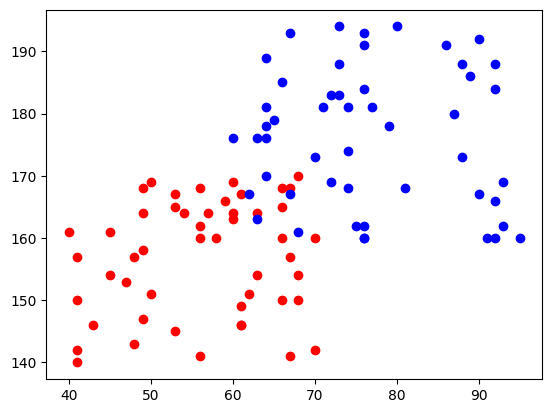

In [18]:
# print('여자 몸무게 : ', [d[0] for d in data[::2]])
# print('여자 키 : ', [d[1] for d in data[::2]])
# print('남자 몸무게 : ', [d[0] for d in data[1::2]])
# print('남자 키 : ', [d[1] for d in data[1::2]])
# for d in data[::2] :
#     plt.plot(d[0], d[1], 'o', color='r')
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'o', color='r')
plt.plot([d[0] for d in data[1::2]],
         [d[1] for d in data[1::2]], 'o', color='b')

# 2. 군집화 로직

In [19]:
# 초기 랜덤지점 2개
random_points = [[random.randint(40, 95), random.randint(140, 195)],
                 [random.randint(40, 95), random.randint(140, 195)]]
random_points

[[55, 176], [62, 163]]

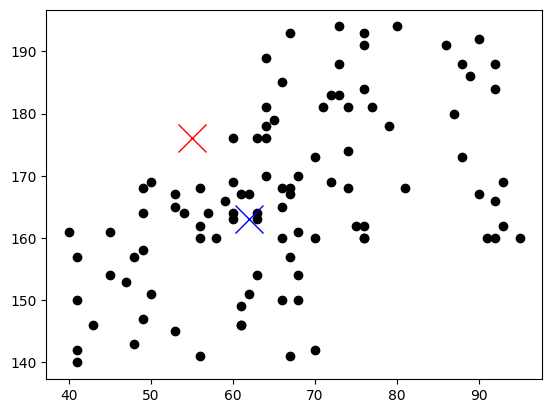

In [20]:
plt.plot([d[0] for d in data],
         [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점 1
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점 2

In [21]:
# 두 점의 거리를 return a:(0,0) ~ b:(4,3)
def dist(a,b) :
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [26]:

a = [1, 0]; b= [4, 3]
dist(a, b)

4.242640687119285

In [22]:
# 두 영역(random_points[0]과 random_points[1]을 기준으로 나눔)
group1 = [] # 기준점 1(random_points[0]이 가까운 그룹)
group2 = [] # 기준점 2(random_points[1]이 가까운 그룹)
for d in data :
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간 x랑 더 가까운 그룹
    else :
        group2.append(d) # 파란 x랑 더 가까운 그룹
len(group1), len(group2)

(29, 71)

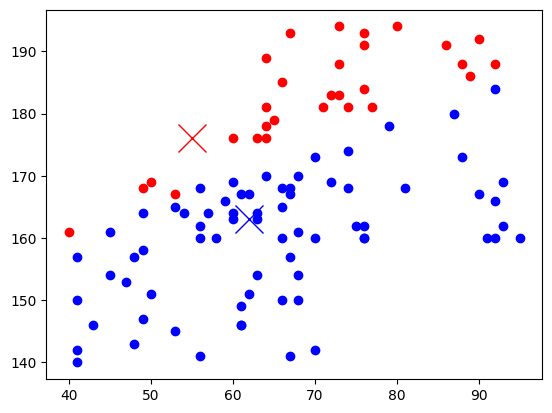

In [25]:
# 새로운 그룹 group1과 group2, 초기 랜덤지점 그래프
plt.plot([d[0]for d in group1],
         [d[1]for d in group1], 'o', color='r')
plt.plot([d[0]for d in group2],
         [d[1]for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점 1
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점 2
plt.show()

In [27]:
# 기준점 이동 group1의 중심점, group2 중심점
sumX = 0; sumY=0
for g in group1 :
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[0] = [sumX/len(group1), sumY/len(group1)]
sumX = 0; sumY=0
for g in group2 :
    sumX += g[0]
    sumY += g[1]
random_points[1] = [sumX/len(group2), sumY/len(group2)]
random_points

[[70.17241379310344, 182.6206896551724],
 [64.87323943661971, 159.98591549295776]]

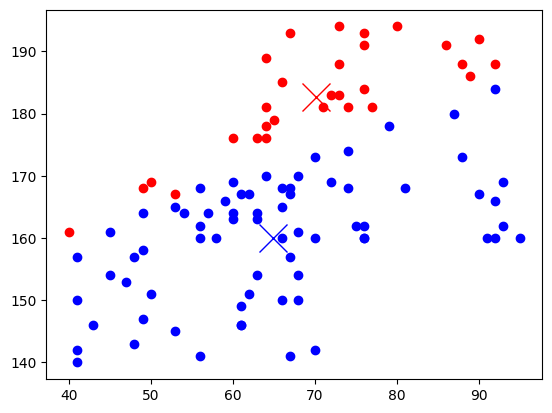

In [28]:
plt.plot([d[0]for d in group1],
         [d[1]for d in group1], 'o', color='r')
plt.plot([d[0]for d in group2],
         [d[1]for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점 1
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=20) # 기준점 2
plt.show()

# 3. 전체 코드(for문 이용)
- data생성
- 랜덤포인트2지점 <br>
- for문
    - 랜덤포인트 2지점 기준으로 2개 group으로 나눔
    - 랜덤포인트 이동(group1 중간점, group2 중간점)

초기 points :  [[60, 154], [70, 172]]
1 번째 points :  [[52.4375, 152.0625], [74.07692307692308, 178.23076923076923]]
2 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
3 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
4 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
5 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
6 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
7 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
8 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
9 번째 points :  [[52.64, 152.7], [74.74, 178.64]]
10 번째 points :  [[52.64, 152.7], [74.74, 178.64]]


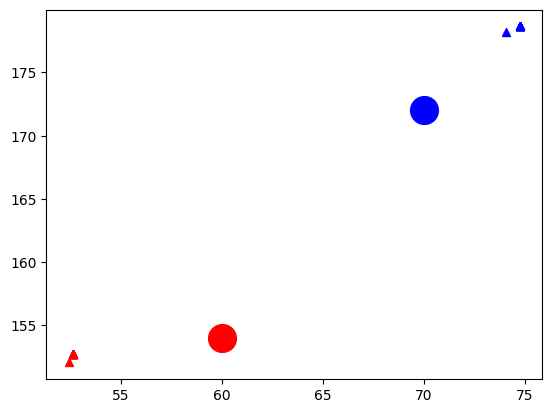

In [32]:
# 데이터 생성
data = []
for i in range(50) :
    # 여자 데이터
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터
    data.append([random.randint(60, 95), random.randint(160, 195)])
# point 지정
points = [[random.randint(40, 95), random.randint(140, 195)],
          [random.randint(40, 95), random.randint(140, 195)]]
print("초기 points : ", points)
plt.plot(points[0][0], points[0][1], 'o', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'o', color='b', markersize=20)
# 포인트 2지점 기준으로 group1과 group2
for i in range(1, 11) :
    group1 = [] # points[0]과 가까운 그룹
    group2 = [] # points[1]과 가까운 그룹
    for d in data :
        if dist(d, points[0]) < dist(d, points[1]) :
            group1.append(d)
        else :
            group2.append(d)
    # 새로운 포인트로 할당
    sumX = 0; sumY=0
    for g in group1 :
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX/len(group1), sumY/len(group1)]
    sumX = 0; sumY=0
    for g in group2 :
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i, "번째 points : ", points)
    plt.plot(points[0][0], points[0][1], '^', color='r')
    plt.plot(points[1][0], points[1][1], '^', color='b')

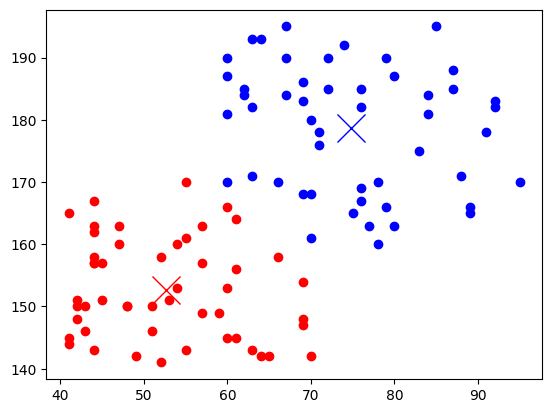

In [33]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)

# 4. api(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측모델
        ; 분류, 회귀, 군집분석
        fit(학습), predict(예측)
    * 변환모델
        ; 전처리 ex. 스케일조정
        fit(학습), transform(변환함수)

In [35]:
# 군집분석 라이브러리가 joblib 충돌 경고 메세지 출력
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [41]:
data = np.array(data)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # n개 그룹으로 나눔
               init='random', # 초기 중심점 랜덤
               n_init=10, # 10번 실행
               random_state=7)
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [42]:
# 중심점
model.cluster_centers_

array([[ 74.74, 178.64],
       [ 52.64, 152.7 ]])

In [43]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [44]:
data[model.labels_==1]

array([[ 51, 146],
       [ 63, 143],
       [ 47, 160],
       [ 55, 170],
       [ 41, 165],
       [ 61, 156],
       [ 42, 150],
       [ 69, 147],
       [ 45, 157],
       [ 54, 160],
       [ 42, 148],
       [ 44, 157],
       [ 61, 164],
       [ 41, 145],
       [ 43, 150],
       [ 48, 150],
       [ 48, 150],
       [ 49, 142],
       [ 41, 144],
       [ 69, 154],
       [ 69, 148],
       [ 44, 162],
       [ 44, 158],
       [ 60, 145],
       [ 55, 161],
       [ 66, 158],
       [ 45, 151],
       [ 64, 142],
       [ 53, 151],
       [ 65, 142],
       [ 44, 167],
       [ 44, 163],
       [ 43, 146],
       [ 60, 153],
       [ 52, 141],
       [ 47, 163],
       [ 54, 153],
       [ 59, 149],
       [ 51, 150],
       [ 60, 166],
       [ 55, 143],
       [ 44, 143],
       [ 57, 149],
       [ 57, 157],
       [ 61, 145],
       [ 44, 157],
       [ 42, 151],
       [ 70, 142],
       [ 52, 158],
       [ 57, 163]])

In [45]:
group1 = data[model.labels_==1]
group2 = data[model.labels_==0]
c1, c2 = model.cluster_centers_

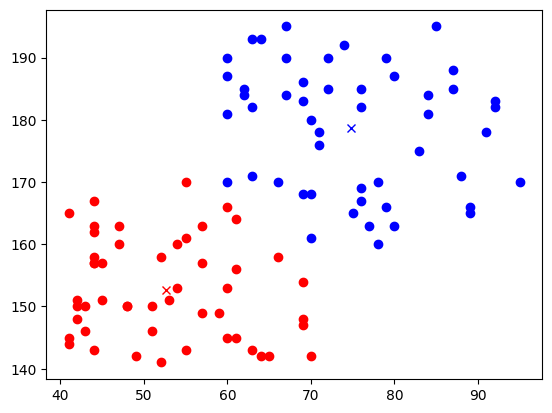

In [47]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2], 'o', color='b')
plt.plot(c1[0], c1[1], 'x', color='b') # group2의 중심점
plt.plot(c2[0], c2[1], 'x', color='r') # group1의 중심점